#Recommender System for E-commerce
###Problem Statement:
Build a recommender system that suggests products to users based on their preferences
and behavior. Use a dataset like the Amazon Customer Reviews (Electronics) dataset.


1. **Objective:**
   - The main goal is to create a recommender system that provides personalized product recommendations to users. The recommendations should be based on the users' preferences and behavior.

2. **Recommender System:**
   - A recommender system is a type of software that analyzes user behavior, preferences, or historical data to suggest items that the user might be interested in. In the context of e-commerce, this often involves suggesting products for users to purchase.

3. **Dataset:**
   - The dataset mentioned for training is the Amazon Customer Reviews (Electronics) dataset. This dataset likely contains information about users, products, and reviews in the electronics category on Amazon.

4. **User Preferences and Behavior:**
   - The recommender system needs to take into account user preferences and behavior. This could include the products they have viewed, purchased, or positively reviewed in the past.

5. **Input Data:**
   - The input data for this problem includes information about users, products, and their interactions. This could involve user IDs, product IDs, ratings, reviews, and other relevant features.

6. **Recommender System Algorithm:**
   - Various algorithms can be used for building recommender systems, including collaborative filtering, content-based filtering, and hybrid methods. Collaborative filtering relies on user-item interactions, while content-based filtering considers the features of items and users.

7. **Training:**
   - The model is trained on the Amazon Customer Reviews (Electronics) dataset. During training, the recommender system learns patterns and relationships between users and products, allowing it to make predictions about which products a user might be interested in.

8. **Evaluation:**
   - The performance of the recommender system is evaluated on a separate dataset, which could be a test set from the Amazon Customer Reviews (Electronics) dataset. Common evaluation metrics for recommender systems include precision, recall, and mean squared error.

9. **Application:**
   - Once the recommender system is trained and validated, it can be deployed to provide personalized product recommendations to users on an e-commerce platform. This can enhance the user experience, increase user engagement, and potentially boost sales by offering relevant suggestions.

Dataset: https://www.kaggle.com/datasets/chetanbharambe/amazon-product-reviews/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [3]:
# Read the CSV file into a DataFrame
amazon_reviews = pd.read_csv('/content/drive/MyDrive/dataset/Reviews.csv')

# Drop rows with missing values
amazon_reviews = amazon_reviews.dropna()

# Display the first few rows of the DataFrame
amazon_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
amazon_reviews.shape

(568411, 10)

In [5]:
popular_products = pd.DataFrame(amazon_reviews.groupby('ProductId')['Score'].count())
most_popular = popular_products.sort_values('Score', ascending=False)
most_popular.head(20)

,Score
ProductId,
B007JFMH8M,913
B0026RQTGE,632
B002QWP8H0,632
B002QWHJOU,632
B002QWP89S,632
B003B3OOPA,623
B001EO5Q64,567
B001RVFERK,564
B0026KNQSA,564


<Axes: xlabel='ProductId'>

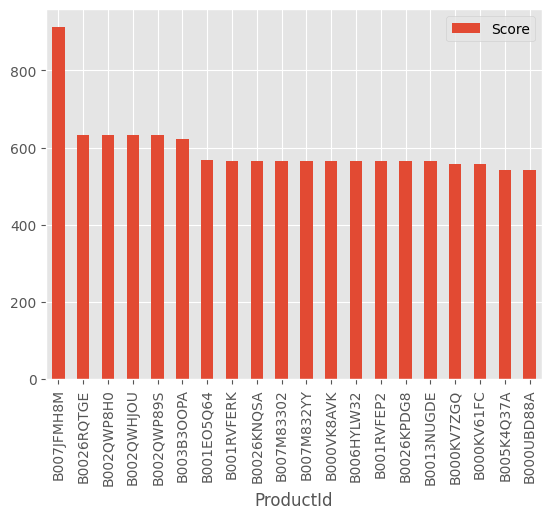

In [6]:
most_popular.head(20).plot(kind = "bar")

#part2
##collaborative filtering (based on user-product ratings)

In [7]:
amazon_reviews1 = amazon_reviews.head(10000)

In [8]:
ratings_utility_matrix = amazon_reviews1.pivot_table(values='Score', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,B00002NCJC,B00002Z754,B00005V3DC,B000084DVR,B000084E1U,B000084EK4,B000084EK5,B000084EK6,B000084EK7,B000084EK8,...,B0092XAMDQ,B0093NIWVO,B00959DMWK,B00961CUXO,B0096E5196,B009AVDFCK,B009D668KS,B009HINRX8,B009UOFU20,B009WSNWC4
UserId,,,,,,,,,,,,,,,,,,,,,
A10012K7DF3SBQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1001TYW5FZYD9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1008DPSP6KC9J,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A101C99CG8EFUH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A102XKYZE9Q9L4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ratings_utility_matrix.shape

(9015, 1422)

In [10]:
X = ratings_utility_matrix.T
X.head()

UserId,A10012K7DF3SBQ,A1001TYW5FZYD9,A1008DPSP6KC9J,A101C99CG8EFUH,A102XKYZE9Q9L4,A10317LUD1C1VJ,A10389F7LRIZWQ,A103EZCS9H8WW1,A103U3KR4L2ZXT,A104Y49ZQ4CYJ2,...,AZTEQJCI6N5WL,AZTITR4RTA1Y,AZV26LP92E6WU,AZVQMPXZEHQGZ,AZVR7NPPEDMMN,AZWC23X2AZAQC,AZWWYWR908X25,AZX7EZIIFMFI7,AZYJE40XW6MFG,AZZ7SCDDZR0R3
ProductId,,,,,,,,,,,,,,,,,,,,,
B00002NCJC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00002Z754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005V3DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000084DVR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000084E1U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X.shape

(1422, 9015)

In [12]:
X1 = X

In [13]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1422, 10)

In [14]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1422, 1422)

In [15]:
X.index[786]

'B002JLT6QC'

In [16]:
i = "B002JLT6QC"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID


786

In [17]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(1422,)

recommend

In [18]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['B00002NCJC',
 'B00005V3DC',
 'B0000DC5IY',
 'B0001217OA',
 'B000143ZK2',
 'B000143ZKM',
 'B00016UX0K',
 'B0001FQVCK',
 'B0001M0Z3O']

#part3
##content-based filtering (using product descriptions)

In [19]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [20]:
product_descriptions = amazon_reviews['Text'] + ' ' + amazon_reviews['ProductId']

In [21]:
product_descriptions = product_descriptions.dropna()

In [22]:
product_descriptions.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
dtype: object

In [23]:
product_descriptions.shape

(568411,)

In [24]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

In [25]:
print(product_descriptions1.index)


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
           dtype='int64', length=500)


In [26]:
print(product_descriptions1.head(10))

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good.  It is very soft and ch...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
dtype: object


In [27]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1)
X1

<500x3821 sparse matrix of type '<class 'numpy.float64'>'
	with 13852 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


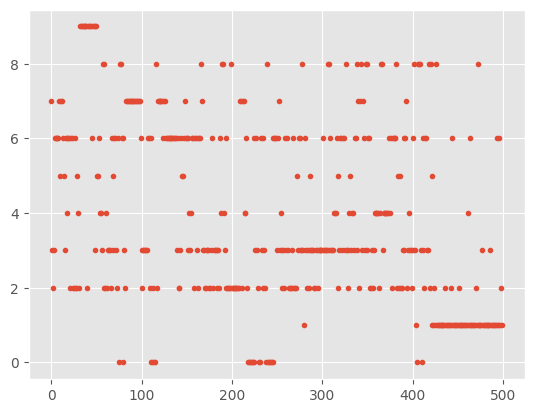

In [28]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [29]:
# # Optimal clusters is

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()  # Use get_feature_names_out() for TfidfVectorizer
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print()


Top terms per cluster:
Cluster 0:
 products
 b004k2ihuo
 terms
 product
 delivery
 company
 taffy
 shipping
 energy
 good

Cluster 1:
 br
 hot
 good
 flavor
 oatmeal
 like
 add
 water
 just
 mix

Cluster 2:
 food
 dog
 b0019cw0he
 cat
 dogs
 cats
 natural
 balance
 dry
 allergies

Cluster 3:
 br
 sauce
 like
 energy
 product
 great
 taste
 love
 don
 teas

Cluster 4:
 chip
 bag
 chocolate
 good
 b004n5kulm
 taste
 buying
 size
 b000g6ryne
 chips

Cluster 5:
 taste
 eat
 great
 just
 buy
 order
 best
 love
 bags
 b000g6ryne

Cluster 6:
 tea
 coffee
 taste
 energy
 drink
 like
 used
 good
 day
 ve

Cluster 7:
 sugar
 use
 product
 b000lkzk7c
 great
 price
 good
 love
 really
 store

Cluster 8:
 b001gvisjm
 twizzlers
 amazon
 candy
 product
 likes
 strawberry
 pack
 gp
 href

Cluster 9:
 chips
 b000g6ryne
 kettle
 flavor
 vinegar
 love
 potato
 bag
 salt
 br



In [30]:
print("Cluster ID:")
Y = vectorizer.transform(["Thai"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[5]


In [31]:
print("Cluster ID:")
Y = vectorizer.transform(["Chips"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[9]


In [32]:
print("Cluster ID:")
Y = vectorizer.transform(["love"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[5]


In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["'any product name'"])
prediction = model.predict(Y)
print(prediction)